In [2]:
!pip install transformers

ERROR: ignored

In [3]:
install.packages('reticulate')
install.packages('tidyverse')
install.packages('DT')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’


Warning message in install.packages("DT"):
“installation of package ‘httpuv’ had non-zero exit status”
Warning message in install.packages("DT"):
“installation of package ‘DT’ had non-zero exit status”


In [ ]:
library(reticulate)
library(tidyverse)
library(DT)

In [ ]:
reticulate::py_config()

In [ ]:
reticulate::py_available()

In [ ]:
reticulate::py_list_packages()

In [ ]:
library(reticulate)

# create a new environment
virtualenv_create("r-reticulate")

In [ ]:
# install SciPy
virtualenv_install("r-reticulate", "transformers")

# import transformers (it will be automatically discovered in "r-reticulate")
transformers <- import("transformers")

In [ ]:
# Instantiate a pipeline
classifier <- transformers$pipeline(task = "text-classification")

In [ ]:
text <- ("This was a real change in filmmaking. Like watching it again in 2020, i.e. after 21 years and it still feels fresh. Iconic scenes are still having benchmarks setting up.
If we say it sci-fi at its best, it won't be wrong. The hype was real, it is still not easy to match the level of Matrix where we experience the connection of humans and science, that too with amazing action fight and chase scenes, not just normal scenes they were, multiple exposures, slow motion 3D moves, Oh My God, and it's understandable as well like what are the characters up to and what storyline they are entering into. The script was very well written and executed otherwise it could have been a mess. A special appreciation in managing the theme with those black color costumes and a scientific zone with unimaginable equipment and props doing unbelievable things in the two worlds created. No spoilers, but the action scenes in the climax where the protagonist goes to save someone from agents are really breathtaking. The technology used at its best.
A salute to Wachowski Brothers and the team for creating this masterpiece. It will be a great competition and motivation as well for many films coming in the future.")

# Let’s use the example of classifying email into spam (email we in no way want) and non-spam (email we want)

In [7]:
spamD <- read.table('spamD.tsv', header=T, sep='\t')

# group anything >= 10 to be in training set; anything under < 10
spamTrain <- subset(spamD, spamD$rgroup>=10)
spamTest <- subset(spamD, spamD$rgroup<10)

# remove these from the data, we don't want to train the data with this
spamVars <- setdiff(colnames(spamD), list('rgroup','spam'))
# spam is what we want to predict
# rgroup is what we're using to split

In [8]:
# get all of the data into a formula such that we can get all of the results

spamFormula <- as.formula(paste('spam=="spam"', paste(spamVars,collapse=' + '), sep=' ~ '))
spamModel <- glm(spamFormula, family=binomial(link='logit'), data=spamTrain)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [9]:
spamFormula

# we have class name (spam == 'spam' gives TRUE or FALSE in 1 to 0 format) BY variable1 + variable 2, etc.
# adding all the weights in all variables/features into the formula
# applying equal weights

# we're getting the counts (frequencies) of the word appearing
# EX: how many times is 'our' appearing? This number is stored in word.freq.our

# NOTE: remove the class variable in the training bc this is what should our model should predict
# look at setdiff() line above

spam == "spam" ~ word.freq.make + word.freq.address + word.freq.all + 
    word.freq.3d + word.freq.our + word.freq.over + word.freq.remove + 
    word.freq.internet + word.freq.order + word.freq.mail + word.freq.receive + 
    word.freq.will + word.freq.people + word.freq.report + word.freq.addresses + 
    word.freq.free + word.freq.business + word.freq.email + word.freq.you + 
    word.freq.credit + word.freq.your + word.freq.font + word.freq.000 + 
    word.freq.money + word.freq.hp + word.freq.hpl + word.freq.george + 
    word.freq.650 + word.freq.lab + word.freq.labs + word.freq.telnet + 
    word.freq.857 + word.freq.data + word.freq.415 + word.freq.85 + 
    word.freq.technology + word.freq.1999 + word.freq.parts + 
    word.freq.pm + word.freq.direct + word.freq.cs + word.freq.meeting + 
    word.freq.original + word.freq.project + word.freq.re + word.freq.edu + 
    word.freq.table + word.freq.conference + char.freq.semi + 
    char.freq.lparen + char.freq.lbrack + char.freq

In [10]:
# train using binomial modal
spamModel <- glm(spamFormula, family=binomial(link='logit'), data=spamTrain)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [14]:
# get all prediction values for the train model
spamTrain$pred <- predict(spamModel, newdata=spamTrain, type='response')
spamTest$pred <- predict(spamModel, newdata=spamTest, type='response')

In [12]:
# truth table
print(with(spamTest,table(y=spam,glmPred=pred>0.5)))

          glmPred
y          FALSE TRUE
  non-spam   264   14
  spam        22  158


In [19]:
# the confusion matrix for training
table(truth=spamTrain$spam,prediction=spamTrain$pred>0.5)

          prediction
truth      FALSE TRUE
  non-spam  2396  114
  spam       178 1455

In [13]:
# the confusion matrix for testing
cM <- table(truth=spamTest$spam,prediction=spamTest$pred>0.5)
cM

          prediction
truth      FALSE TRUE
  non-spam   264   14
  spam        22  158

We can calculate accuracy: (TP+TN)/total
(158+14)/(158+14+22+264) = 0.37

In [20]:
install.packages('ggplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


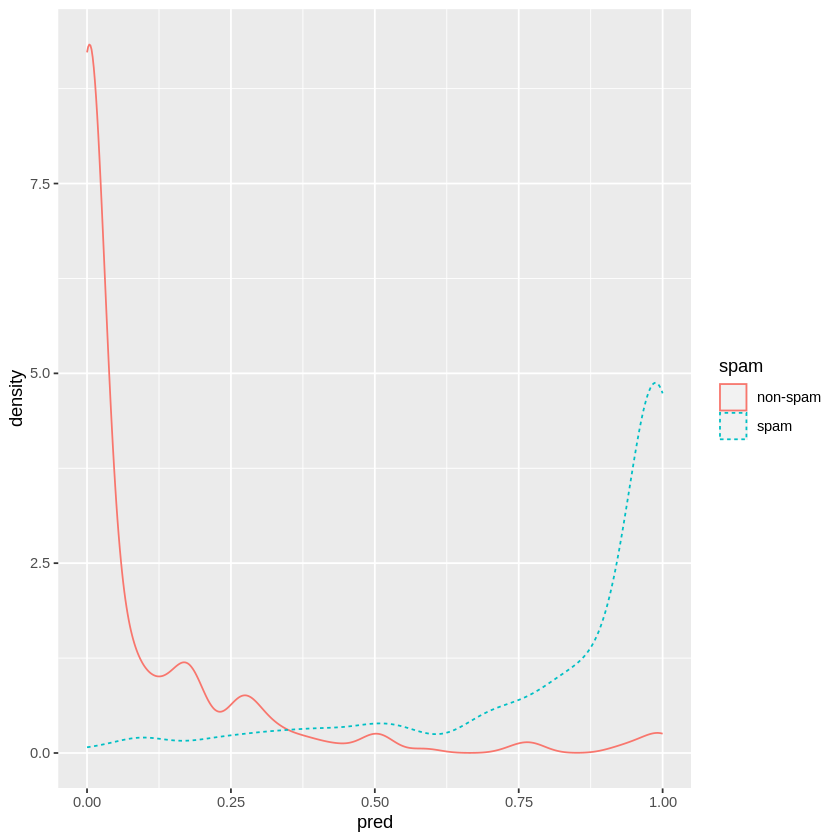

In [21]:
library(ggplot2)
ggplot(data=spamTest) + geom_density(aes(x=pred,color=spam,linetype=spam))

# The confidence of something being spam is inversely proportional to something being not spam
# There's a tradeoff

In [33]:
install.packages('sentimentr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘zoo’, ‘dtt’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘slam’, ‘lexicon’, ‘syuzhet’, ‘textclean’, ‘textshape’




In [ ]:
library(sentimentr)
sentiment_by('I am not very good', by = NULL)

,element_id,word_count,sd,ave_sentiment
,<int>,<int>,<dbl>,<dbl>
1,1,5,NA,-0.06708204


In [ ]:
library(sentimentr)
text <- 'My life has become terrible since I met you and lost money. But I still have got a little hope left in me'
analysis <- sentiment_by(text, by = NULL)
highlight(analysis)

# Lecture 12

## Decision Tree

In [23]:
#To calculate deviance
loglikelihood <- function(y, py) {
  pysmooth <- ifelse(py==0, 1e-12,
              ifelse(py==1, 1-1e-12, py))
              sum(y * log(pysmooth) + (1-y)*log(1 - pysmooth))}

In [54]:
# get accuracy values
accuracyMeasures <- function(pred, truth, name="model") {
  #dev.norm <- -2*loglikelihood(as.numeric(truth), pred)/length(pred)
  ctable <- table(truth=truth, pred=(pred>0.5))
  accuracy <- sum(diag(ctable))/sum(ctable)
  precision <- ctable[2,2]/sum(ctable[,2])
  recall <- ctable[2,2]/sum(ctable[2,])
  f1 <- (precision*recall) / (precision + recall)
  data.frame(model=name, accuracy=accuracy, f1=f1, dev.norm)
}

In [26]:
accuracyMeasures(spamTest$pred, spamTest$spam, name="Logistic Regression")

# the model accuracy is 92% for logistic regression
# f1 score: ration of precision and recall; relationship between how much TP and TN affect FP and FN - how correctly the model works

Warning message in loglikelihood(as.numeric(truth), pred):
“NAs introduced by coercion”


model,accuracy,f1,dev.norm
<chr>,<dbl>,<dbl>,<dbl>
Logistic Regression,0.9213974,0.4488636,NA


### Fit a decision tree model

In [28]:
install.packages('rpart')
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
treemodel <- rpart(spamFormula, spamTrain)
treemodel

# split, n, deviance, yval for each node
# * the end of tree branch

n= 4143 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 4143 989.338600 0.39415880  
   2) char.freq.bang< 0.0795 2381 308.352800 0.15287690  
     4) word.freq.remove< 0.045 2210 199.699500 0.10045250  
       8) char.freq.dollar< 0.164 2138 156.482700 0.07951356  
        16) word.freq.free< 0.115 1968 110.044200 0.05945122 *
        17) word.freq.free>=0.115 170  36.476470 0.31176470 *
       9) char.freq.dollar>=0.164 72  14.444440 0.72222220 *
     5) word.freq.remove>=0.045 171  24.081870 0.83040940  
      10) word.freq.george>=0.08 14   0.000000 0.00000000 *
      11) word.freq.george< 0.08 157  13.566880 0.90445860 *
   3) char.freq.bang>=0.0795 1762 355.060700 0.72020430  
     6) capital.run.length.average< 2.3995 625 150.198400 0.40160000  
      12) word.freq.free< 0.075 454  85.374450 0.25110130  
        24) word.freq.remove< 0.045 409  60.611250 0.18092910  
          48) word.freq.internet< 0.08 377  43.368700 0.13262600 *
          49) word.f

In [32]:
# evaluate the decision tree by getting accuracy models
accuracyMeasures(predict(treemodel, newdata=spamTrain),spamTrain$spam=="spam",
name="tree, training")

accuracyMeasures(predict(treemodel, newdata=spamTest), spamTest$spam=="spam",
name="tree, test")

# not getting as good metrics as logistic regression model

model,accuracy,f1,dev.norm
<chr>,<dbl>,<dbl>,<dbl>
"tree, training",0.9104514,0.441685,0.5618654


model,accuracy,f1,dev.norm
<chr>,<dbl>,<dbl>,<dbl>
"tree, test",0.8799127,0.4207493,0.6702857


## Bagging
Have multiple trees and comparing which one best fits the data OR combining the trees into 1

In [35]:
# Use the bootstrap sample, the same size as training set with 100 trees
ntrain <- dim(spamTrain)[1]
n <- ntrain
ntree <- 100

In [38]:
# build a collection of samples to build 100 trees
samples <- sapply(1:ntree, FUN = function(iter){sample(1:ntrain, size=n, replace=T)})

In [40]:
# Train each decision tree and return a list of them
treelist <-lapply(1:ntree, FUN=function(iter) {
  samp <- samples[,iter]
  rpart(spamFormula, spamTrain[samp,])
  })

In [41]:
# what is the accuracy measures for each model? sum all up
predict.bag <- function(treelist, newdata) {
  preds <- sapply(1:length(treelist), FUN=function(iter) {
    predict(treelist[[iter]], newdata=newdata)}) # go through each tree and make a prediction
  predsums <- rowSums(preds)
  predsums/length(treelist)
}

In [42]:
# accuracy of train test
accuracyMeasures(predict.bag(treelist, newdata=spamTrain),spamTrain
$spam=="spam", name="bagging, training")

# accuracy of test test
accuracyMeasures(predict.bag(treelist, newdata=spamTest),spamTest$spam=="spam",
name="bagging, test")

# bagging has slightly increased the accuracy measures compared to DT, but is still not that great (f1)
# to get the best splits from all the models and to avoid overfitting

model,accuracy,f1,dev.norm
<chr>,<dbl>,<dbl>,<dbl>
"bagging, training",0.9234854,0.4501729,0.4689186


model,accuracy,f1,dev.norm
<chr>,<dbl>,<dbl>,<dbl>
"bagging, test",0.9082969,0.4382353,0.5276125


## Random Forest
Difference:
- we're pruning, cutting the tree at certain depths
- we're training different kinds of trees (bagging)
- training variance - removes outliers

Robust to outliers

In [43]:
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [58]:
# convert "spam" and "not spam" to binary 1 and 0 for random forest model
spamTrain$spam <- ifelse(spamTrain$spam == "spam", 1,0)
spamTest$spam <- ifelse(spamTest$spam == "spam", 1,0)
spamTrain$spam
spamTest$spam

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [48]:
# some random seed to make the run repeatable.
set.seed(5123512)

In [59]:
#T = save the algorithm. nodesize is minimum elements in tree.
# nodesize will tell us how deep we want the tree to be
# importance = T : The model should store how important the feature should be - to evaluate the trees
fmodel <- randomForest(x=spamTrain[,spamVars], y=spamTrain$spam, ntree=100, nodesize=7, importance=T)


Warning message in randomForest.default(x = spamTrain[, spamVars], y = spamTrain$spam, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


In [60]:
#To calculate
accuracyMeasures(predict(fmodel,newdata=spamTrain[,spamVars]), spamTrain$spam=="1",name="random forest, train")
accuracyMeasures(predict(fmodel,newdata=spamTest[,spamVars]),spamTest$spam=="1",name="random forest, test")

ERROR: ignored

In [61]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Warning message in install.packages("caret"):
“installation of package ‘clock’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”


ERROR: ignored

In [ ]:
confusionMatrix(predict(fmodel,newdata=spamTrain[,spamVars]), spamTrain$spam)

## Examining variable importance

,%IncMSE,IncNodePurity
word.freq.make,0,0
word.freq.address,0,0
word.freq.all,0,0
word.freq.3d,0,0
word.freq.our,0,0
word.freq.over,0,0
word.freq.remove,0,0
word.freq.internet,0,0
word.freq.order,0,0
word.freq.mail,0,0


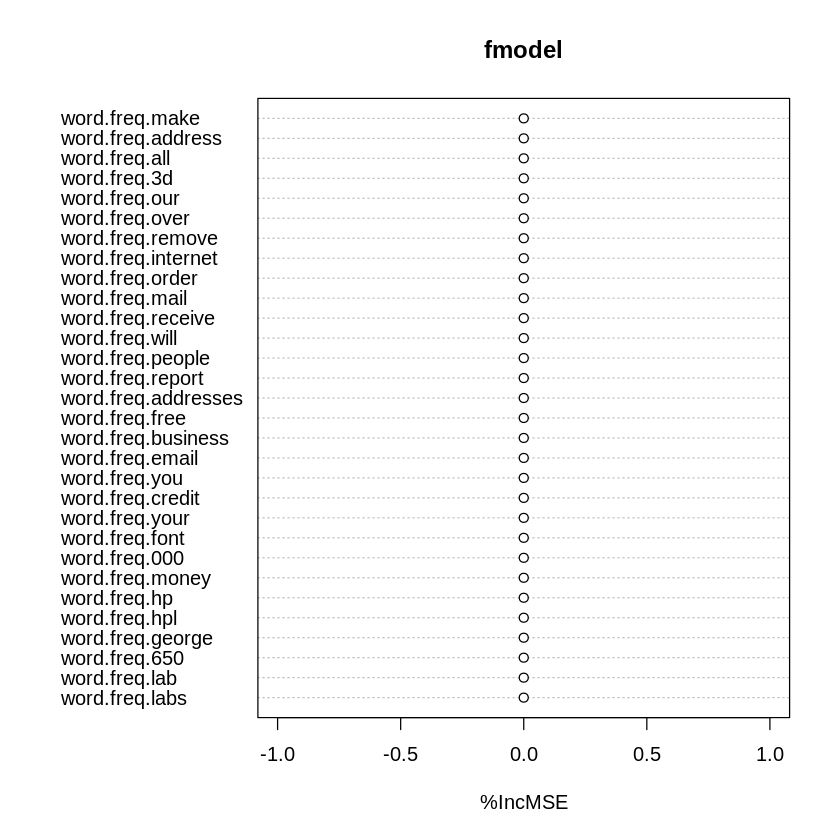

In [63]:
varImp <- importance(fmodel)
varImp[1:10, ]
varImpPlot(fmodel, type=1)

# remove and bang are of highest importance - non-monotonic effects

## To visualize the tree

In [66]:
install.packages('devtools')
library(devtools)
devtools::install_github('araastat/reprtree')
library(reprtree)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




plotrix (NA -> 3.8-3 ) [CRAN]
tree    (NA -> 1.0-43) [CRAN]


Installing 2 packages: plotrix, tree

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpb9VJkR/remotes1811e0a5cef/araastat-reprtree-7ebb9ff/DESCRIPTION’ ... OK
* preparing ‘reprtree’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘reprtree_0.6.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tree

Loading required package: plotrix

Registered S3 method overwritten by 'reprtree':
  method    from
  text.tree tree



In [67]:
getTree(fmodel)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,41,1.3200,-3,0
2,4,5,30,3.4700,-3,0
3,6,7,6,0.2500,-3,0
4,8,9,12,2.2300,-3,0
5,10,11,35,4.2500,-3,0
6,12,13,19,3.5300,-3,0
7,0,0,0,0.0000,-1,0
8,14,15,52,1.0260,-3,0
9,0,0,0,0.0000,-1,0
10,16,17,25,0.0000,-3,0


# GEE Example

In [68]:
install.packages("geepack")
library(geepack)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
data(dietox)

# convert copper and evit variables to categorical
dietox$Cu <- as.factor(dietox$Cu)
dietox$Evit <- as.factor(dietox$Evit)

# apply the formula - weight by time + Evitamin + copper
mf <- formula(Weight ~ Time + Evit + Cu)
head(dietox)

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
1,4601,Evit000,Cu000,1,26.5,26.50000,NA,1
2,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
3,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
4,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
5,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
6,4601,Evit000,Cu000,1,26.5,55.39999,56.900002,6


In [74]:
# GEE model
geeInd <- geeglm(mf, id=Pig, data=dietox, family=gaussian, corstr="ind")
summary(geeInd)

# time is larger and more significant
# the more time pig lived to be fed, the heavier it is


Call:
geeglm(formula = mf, family = gaussian, data = dietox, id = Pig, 
    corstr = "ind")

 Coefficients:
            Estimate Std.err    Wald Pr(>|W|)    
(Intercept)  15.0728  1.4219  112.37   <2e-16 ***
Time          6.9483  0.0798 7582.55   <2e-16 ***
EvitEvit100   2.0813  1.8418    1.28     0.26    
EvitEvit200  -1.1133  1.8483    0.36     0.55    
CuCu035      -0.7887  1.5349    0.26     0.61    
CuCu175       1.7767  1.8213    0.95     0.33    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation structure = independence 
Estimated Scale Parameters:

            Estimate Std.err
(Intercept)     48.3    9.31
Number of clusters:   72  Maximum cluster size: 12 

In [75]:
anova(geeInd)

# time is very significant

,Df,X2,P(>|Chi|)
,<dbl>,<dbl>,<dbl>
Time,1,7506.79,0.000
Evit,2,3.74,0.154
Cu,2,1.78,0.410
